<a href="https://colab.research.google.com/github/jeeda4/ML_Project/blob/master/ML_Project(Model1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project


First Model: XGBoost 

Spring 2020 



In [0]:
#setting up 
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

In [0]:
#Importing the data
InstagramDF = pd.read_csv ("https://raw.githubusercontent.com/GuiZamorano/Instagram_Like_Predictor/master/InstagramDatasetRegression.csv", encoding='utf-8-sig')

In [0]:
#since predicting number of likes/mean 
X = InstagramDF
Y = X['number_of_likes/mean'].values
X = X.drop('number_of_likes/mean', axis = 1).values

In [0]:
#since predicting number of likes/mean 
X = InstagramDF
Y = X['number_of_likes/mean'].values
X = X.drop('number_of_likes/mean', axis = 1).values

In [0]:
#splitting the data into train and test data 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [86]:
import warnings
warnings.filterwarnings('ignore')
all_regressors = []
all_regressors.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
all_regressors.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
all_regressors.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
all_regressors.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
all_regressors.append(('BYR', Pipeline([('Scaler', StandardScaler()),('BYR', BayesianRidge())])))
all_regressors.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
all_regressors.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
all_regressors.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVR())])))
all_regressors.append(('XGB', Pipeline([('Scaler', StandardScaler()),('XGB', xgb.XGBRegressor())])))

train_error = []
test_error = []
train_error2 = []
test_error2 = []
for name, model in all_regressors:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results_train = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results_test = cross_val_score(model, X_test, Y_test, cv=kfold, scoring='neg_mean_squared_error')
    cv_results_train2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    cv_results_test2 = cross_val_score(model, X_test, Y_test, cv=kfold, scoring='r2')
    train_error.append(cv_results_train.mean())
    test_error.append(cv_results_test.mean())
    train_error2.append(cv_results_train2.mean())
    test_error2.append(cv_results_test2.mean())

[23:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [87]:
col={'Train Error MSE':train_error,'Test Error MSE':test_error, 'Train Error R^2':train_error2,'Test Error R^2':test_error2}
models=['Linear Regression', 'Lasso Regression', 'ElasticNet', 'Ridge Regression', 'Bayesian Regression','KNN','Decision Tree','SVM', 'XGBoost']
df=pd.DataFrame(data=col,index=models)
df

,Train Error MSE,Test Error MSE,Train Error R^2,Test Error R^2
Linear Regression,-0.241637,-0.265845,0.043391,0.024857
Lasso Regression,-0.252769,-0.273798,-0.000751,-0.003683
ElasticNet,-0.252769,-0.273798,-0.000751,-0.003683
Ridge Regression,-0.241637,-0.265810,0.043390,0.024992
Bayesian Regression,-0.241568,-0.264739,0.043662,0.029213
KNN,-0.285912,-0.308872,-0.132389,-0.139583
Decision Tree,-0.518958,-0.539307,-1.022629,-1.008294
SVM,-0.251827,-0.275926,0.003095,-0.011792
XGBoost,-0.240816,-0.267621,0.046508,0.017558


In [0]:
from sklearn.model_selection import cross_validate   #Additional scklearn functions
from sklearn.model_selection import learning_curve, GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [0]:
df = InstagramDF

In [0]:
df = df.rename(columns={'number_of_likes/mean': 'number_of_likes_over_mean', '(0, 4]': 'zero_to_four', '(4, 8]': 'four_to_eight', '(8, 12]': 'eight_to_twelve', '(12, 16]': 'twelve_to_sixteen', '(16, 20]': 'sixteen_to_twenty','(20, 24]': 'twenty_to_twentyfour'})

In [0]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target = 'number_of_likes_over_mean'
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['number_of_likes_over_mean'],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #accuracy = accuracy_score(Y_train, dtrain_predictions)

    #Print model report:
    print("\nModel Report")
    print("Mean Squared Error : %.4g" % metrics.mean_squared_error(dtrain['number_of_likes_over_mean'].values, dtrain_predictions))
    print("R^2 Score (Train): %f" % metrics.r2_score(dtrain['number_of_likes_over_mean'], dtrain_predictions))

    #print("Accuracy: %.2f%%" % (accuracy * 100.0))



In [92]:
from sklearn.metrics import accuracy_score
predictors = [x for x in df.columns if x not in [target]]
xgb1 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df, predictors)


Model Report
Mean Squared Error : 0.2289
R^2 Score (Train): 0.108993


In [93]:
xgb1.n_estimators

36

In [94]:
param_test1 = {
 'max_depth':np.arange(3,10,2),
 'min_child_weight':np.arange(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=37, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df[predictors],df[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2.55238838, 2.56655231, 2.55131273, 3.94536715, 3.87385082,
         3.86643605, 5.59115996, 5.58779035, 5.47514048, 7.71160626,
         7.25007882, 6.31443534]),
  'mean_score_time': array([0.05529585, 0.07775779, 0.0879107 , 0.07527204, 0.0898375 ,
         0.07639837, 0.05121188, 0.05640655, 0.08342333, 0.09969244,
         0.08197808, 0.04904032]),
  'mean_test_score': array([-0.24343453, -0.24346239, -0.24342487, -0.24427776, -0.24375807,
         -0.24391426, -0.24616936, -0.24563567, -0.24602467, -0.24896873,
         -0.24788745, -0.24848612]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, Fa

In [95]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate=0.1, n_estimators=37, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df[predictors],df[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([1.98094831, 1.92906275, 1.95407057, 2.52189989, 2.55506668,
         2.506358  , 3.24851298, 3.22374778, 2.85252204]),
  'mean_score_time': array([0.07570796, 0.05326529, 0.06831536, 0.06211381, 0.07280202,
         0.0741075 , 0.06441369, 0.08370719, 0.04054999]),
  'mean_test_score': array([-0.24413077, -0.24410623, -0.24411893, -0.24347795, -0.24342487,
         -0.24336446, -0.24344515, -0.24358253, -0.24348063]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2, 'min_child_weight': 4},
   {'max_depth': 2, 'min_child_weig

In [96]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=37, max_depth=4,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df[predictors],df[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([3.22879109, 3.30446968, 3.24232407, 3.25698776, 2.82403307]),
  'mean_score_time': array([0.05225315, 0.09338574, 0.08568892, 0.06358714, 0.05275345]),
  'mean_test_score': array([-0.24358253, -0.24358342, -0.24356638, -0.24356649, -0.24353358]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([4, 5, 2, 3, 1], dtype=int32),
  'split0_test_score': array([-0.23475756, -0.23475756, -0.23463098, -0.23462183, -0.23461444]),
  'split1_test_score': array([-0.234754  , -0.23474682, -0.23474687, -0.23475437, -0.23484628]),
  'split2_test_score': array([-0.24897056, -0.24897056, -0.24898563, -0.24898563, -0.24898563]),
  'split3_test_score': array([-0.23868784, -0.23869945, -0.23870027, -0.23869785, -0.23848239]),
  

In [97]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, df, predictors)


Model Report
Mean Squared Error : 0.2355
R^2 Score (Train): 0.083437


In [98]:
xgb2.n_estimators

38

In [99]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=42, max_depth=4,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df[predictors],df[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

[23:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([3.2005343 , 3.05971503, 3.13870964, 2.9225112 , 3.57178411,
         3.38056293, 3.37001042, 3.14131613, 3.86347713, 3.60053463,
         3.62304354, 3.52047248, 4.08635864, 3.94608831, 3.87394137,
         3.49660001]),
  'mean_score_time': array([0.06637807, 0.09273434, 0.07517848, 0.06160097, 0.07479324,
         0.06723452, 0.06898451, 0.08476105, 0.09798474, 0.10137863,
         0.06739511, 0.0681004 , 0.10615005, 0.10239058, 0.049822  ,
         0.04337864]),
  'mean_test_score': array([-0.24385901, -0.24384116, -0.24390652, -0.24361086, -0.24365345,
         -0.24371057, -0.24347853, -0.24343405, -0.24384353, -0.2437186 ,
         -0.24343797, -0.24345505, -0.24382635, -0.24356852, -0.24324573,
         -0.24336599]),
  'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8,
                     0.8, 0.9, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
             

In [100]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(55,70,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=42, max_depth=4,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.6,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(df[predictors],df[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

[23:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([2.91145415, 2.95630641, 2.92379913, 3.01984921, 3.06974931,
         2.98313732, 3.13539042, 3.18920388, 2.8714756 ]),
  'mean_score_time': array([0.07345133, 0.06244316, 0.07935209, 0.04642758, 0.0760745 ,
         0.06427722, 0.11284614, 0.08503208, 0.0577014 ]),
  'mean_test_score': array([-0.24388982, -0.24361672, -0.24352048, -0.24392883, -0.24390652,
         -0.24365451, -0.24371344, -0.24382342, -0.24367064]),
  'param_colsample_bytree': masked_array(data=[0.55, 0.55, 0.55, 0.6, 0.6, 0.6, 0.65, 0.65, 0.65],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.55, '

In [101]:
param_test6 = {
    'reg_alpha':[0.5, 1, 5, 10, 50],
    'reg_lambda':[5e-4, 1e-3, 5e-3]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=42, max_depth=4,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.6,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch6.fit(df[predictors],df[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

[23:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([3.01397681, 3.09245729, 2.93325081, 3.1157423 , 2.9443337 ,
         3.06270175, 2.94500661, 2.91903563, 3.02433391, 2.94435921,
         2.87936926, 2.82138395, 2.69989085, 2.83095298, 2.36867404]),
  'mean_score_time': array([0.05712876, 0.09000707, 0.09987369, 0.07333035, 0.10150943,
         0.05959897, 0.05727315, 0.06729631, 0.09163504, 0.05532131,
         0.07487774, 0.05615697, 0.11065378, 0.05432391, 0.04031253]),
  'mean_test_score': array([-0.24377289, -0.24377286, -0.24377264, -0.24355618, -0.24355617,
         -0.24355605, -0.24353856, -0.24353856, -0.24353857, -0.24360617,
         -0.24360617, -0.24360618, -0.2449308 , -0.2449308 , -0.24493081]),
  'param_reg_alpha': masked_array(data=[0.5, 0.5, 0.5, 1, 1, 1, 5, 5, 5, 10, 10, 10, 50, 50,
                     50],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False, False, False, False],
         fill_value='?',
           

In [102]:
xgb3 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 reg_alpha=1,
 reg_lambda=0.001,   
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, df, predictors)

[23:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model Report
Mean Squared Error : 0.2355
R^2 Score (Train): 0.083464


In [103]:
xgb4 = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 reg_alpha=1,
 reg_lambda=0.001,  
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, df, predictors)


Model Report
Mean Squared Error : 0.235
R^2 Score (Train): 0.085235


In [104]:
print(np.sqrt(metrics.mean_squared_error(df['number_of_likes_over_mean'], xgb4.predict(df[predictors]))))

0.48477507579258294


In [105]:
compare = pd.DataFrame({'Prediction': xgb4.predict(df[predictors]), 'Actual' : df['number_of_likes_over_mean']})
compare.head(5)

,Prediction,Actual
0,1.016946,0.697678
1,0.997318,1.132276
2,0.999351,0.641902
3,1.051713,1.072790
4,1.017791,1.059753


In [0]:
Small_difference = abs((df["number_of_likes_over_mean"].values) - xgb4.predict(df[predictors]))  < 0.05
med_difference = abs((df["number_of_likes_over_mean"].values) - xgb4.predict(df[predictors]))  < 0.25
Big_difference = abs((df["number_of_likes_over_mean"].values) - xgb4.predict(df[predictors]))  > 0.5

In [107]:
df[Small_difference].shape[0]

2159

In [108]:
df[med_difference].shape[0]

9888

In [109]:
df[Big_difference].shape[0]

4516

In [0]:
idx_vals = df[Small_difference].index.values
idx_big_vals = df[Big_difference].index.values
compare1 = compare.iloc[idx_vals]
compare2 = compare.iloc[idx_big_vals]

In [111]:
compare1.head(5)

,Prediction,Actual
3,1.051713,1.072790
4,1.017791,1.059753
8,1.021576,1.012914
9,1.031000,1.057489
14,1.065629,1.102865


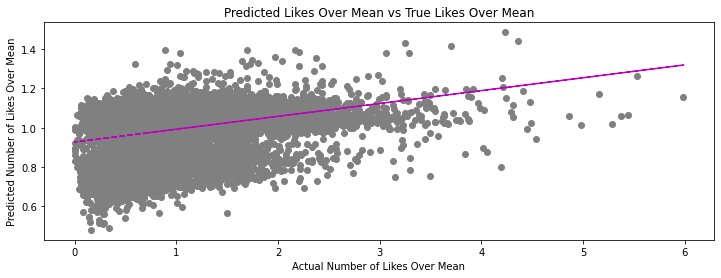

In [112]:
from  matplotlib import pyplot 
pyplot.scatter(df["number_of_likes_over_mean"].values, xgb4.predict(df[predictors]), color="grey")
z = np.polyfit(df["number_of_likes_over_mean"].values, xgb4.predict(df[predictors]), 1)
p = np.poly1d(z)
pyplot.plot(df["number_of_likes_over_mean"].values,p(df["number_of_likes_over_mean"].values),"r--", color="m")
pyplot.title("Predicted Likes Over Mean vs True Likes Over Mean")
pyplot.xlabel("Actual Number of Likes Over Mean")
pyplot.ylabel("Predicted Number of Likes Over Mean")
pyplot.show()